In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,log_loss,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [110]:
df = pd.read_csv("cuisine_data.csv")
df.drop("CustomerID",axis=1,inplace=True)

In [111]:
categorical_cols = ['Gender', 'CityType', 'IncomeLevel', 
                    'Vegetarian', 'SpicyPreference', 'CuisinePreference']

label_encoders = {}

for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df

,Gender,Age,CityType,IncomeLevel,OrdersPerMonth,Vegetarian,SpicyPreference,CuisinePreference
0,1,58,2,2,8,0,2,0
1,0,47,2,2,23,0,1,2
2,1,34,2,1,9,1,0,1
3,1,37,0,1,2,1,1,1
4,1,42,0,2,14,1,1,0
...,...,...,...,...,...,...,...,...
795,1,34,2,2,15,0,2,2
796,1,54,0,2,10,0,2,3
797,1,42,1,2,9,1,0,0
798,1,55,1,0,1,1,0,1


In [112]:
x = df.drop("CuisinePreference",axis=1)
y = df["CuisinePreference"]

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=23)

In [114]:
model = LogisticRegression(multi_class="multinomial")
model.fit(x_train,y_train)

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [115]:
y_pred = model.predict(x_test)
y_pred
y_prob = model.predict_proba(x_test)
y_prob
r2 =  r2_score(y_pred , y_test)
r2

-0.7135761589403973

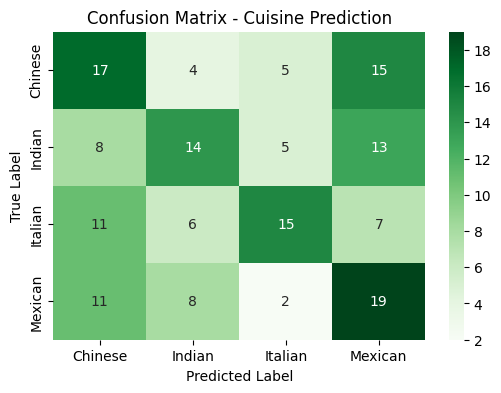

In [116]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoders['CuisinePreference'].classes_,
            yticklabels=label_encoders['CuisinePreference'].classes_)
plt.title("Confusion Matrix - Cuisine Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [117]:
new_data = pd.DataFrame([{
    'Gender': 'Male',
    'Age': 40,
    'CityType': 'Urban',
    'IncomeLevel': 'Medium',
    'OrdersPerMonth': 9,
    'Vegetarian': 'Yes',
    'SpicyPreference': 'High'
}])

for col in categorical_cols:
    if col in new_data:
        new_data[col] = label_encoders[col].transform(new_data[col])

pred = model.predict(new_data)
data = label_encoders['CuisinePreference'].inverse_transform(pred)[0]

print("Predicted Cuisine Preference:", data)

Predicted Cuisine Preference: Indian
